Name: Faiza Siddiqui

Student ID: 200473896

Subject: CS715 - Advanced Data Science and Machine Learning Final Exam - Part 1

# Multiple Regression

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Read Combined Merged data
df_housing = pd.read_excel('/content/FinalMergedDatasets.xlsx', sheet_name="Sheet1")

In [67]:
df_housing.describe()

,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,...,STATIC_CPIXFET,CPIW,Open,High,Low,Close,Adj Close,Volume,Prime Rate,Bank of Canada Overnight Rate
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000,213.000000
mean,198.466667,204.350704,191.772300,203.486385,184.174648,186.587324,439008.450704,479618.779343,372427.230047,5.571394e+05,...,1.713615,1.970423,14084.591552,14470.641721,13610.362908,14119.135233,14119.135233,4.275529e+09,3.489437,1.457746
std,66.429985,70.242944,61.851317,71.078958,65.412001,59.976800,146949.599317,164862.280789,120110.074556,1.946129e+05,...,0.864255,0.950828,2784.526241,2813.483413,2796.601295,2772.303853,2772.303853,1.164077e+09,1.138527,1.264761
min,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,221200.000000,234700.000000,194200.000000,2.738000e+05,...,0.400000,0.700000,7997.600098,9018.500000,7480.000000,8123.000000,8123.000000,3.796520e+07,2.250000,0.250000
25%,147.800000,150.000000,150.000000,145.900000,138.900000,144.500000,327000.000000,352000.000000,291300.000000,3.994000e+05,...,1.200000,1.400000,12200.700195,12511.500000,11649.400391,12239.400391,12239.400391,3.642521e+09,2.700000,0.500000
50%,176.800000,183.000000,171.500000,182.100000,154.800000,159.100000,391000.000000,429600.000000,333100.000000,4.985000e+05,...,1.700000,1.800000,13751.799805,14172.400391,13254.000000,13859.099609,13859.099609,4.271470e+09,3.000000,1.000000
75%,248.000000,251.900000,233.300000,254.200000,233.600000,244.300000,548500.000000,591300.000000,453000.000000,6.961000e+05,...,2.000000,2.100000,15587.000000,15922.599609,15164.700195,15547.799805,15547.799805,4.831907e+09,3.950000,1.750000
max,380.000000,398.200000,370.100000,395.500000,369.100000,338.100000,840600.000000,934500.000000,718700.000000,1.083000e+06,...,5.500000,6.400000,21970.800781,22213.099609,20912.099609,21890.199219,21890.199219,1.099686e+10,6.250000,4.500000


In [68]:
df_housing.head()

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,STATIC_CPIXFET,CPIW,Open,High,Low,Close,Adj Close,Volume,Prime Rate,Bank of Canada Overnight Rate
0,2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,221200,234700,194200,...,1.1,1.6,9190.099609,9246.799805,8952.799805,9204.099609,9204.099609,2335454800,4.25,2.5
1,2005-02-01,100.6,100.6,100.4,100.7,100.3,101.1,222600,236200,195000,...,1.4,1.7,9211.500000,9774.599609,9204.099609,9668.299805,9668.299805,2446392600,4.25,2.5
2,2005-03-01,101.4,101.4,101.0,101.4,100.6,101.7,224300,237900,196200,...,1.5,1.9,9701.200195,9968.400391,9390.500000,9612.400391,9612.400391,2955365700,4.25,2.5
3,2005-04-01,102.2,102.3,101.8,102.2,100.8,102.3,226000,240000,197600,...,1.1,1.8,9675.299805,9701.400391,9243.700195,9369.299805,9369.299805,2377228200,4.25,2.5
4,2005-05-01,102.8,103.0,102.4,103.0,101.0,102.8,227500,241800,198800,...,1.2,1.6,9349.099609,9679.900391,9261.500000,9607.299805,9607.299805,2304422000,4.25,2.5


In [69]:
df_housing.tail()

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,STATIC_CPIXFET,CPIW,Open,High,Low,Close,Adj Close,Volume,Prime Rate,Bank of Canada Overnight Rate
208,2022-05-01,370.3,386.0,360.0,383.6,363.5,337.2,819200,905900,699200,...,5.2,6.3,20707.699219,21212.900391,19480.000000,20729.300781,20729.300781,6123813800,3.20,1.00
209,2022-06-01,363.3,377.9,350.4,376.2,358.0,333.8,803700,887000,680400,...,5.3,6.4,20816.699219,21036.400391,18661.500000,18861.400391,18861.400391,6198477400,3.70,1.50
210,2022-07-01,356.8,370.0,343.3,368.6,353.6,331.7,789300,868500,666600,...,5.5,6.2,18951.199219,19734.000000,18169.900391,19692.900391,19692.900391,4716787900,4.70,2.50
211,2022-08-01,350.8,363.4,336.8,362.4,346.9,328.4,775900,853000,654100,...,5.3,6.0,19568.900391,20323.599609,19329.900391,19330.800781,19330.800781,5300428700,4.70,2.50
212,2022-09-01,345.7,358.1,331.7,357.6,343.4,324.3,764700,840400,644100,...,5.4,6.0,19179.500000,20032.599609,18982.000000,19987.199219,19987.199219,1697976300,5.45,3.25


In [70]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           213 non-null    datetime64[ns]
 1   Composite_HPI_SA               213 non-null    float64       
 2   Single_Family_HPI_SA           213 non-null    float64       
 3   One_Storey_HPI_SA              213 non-null    float64       
 4   Two_Storey_HPI_SA              213 non-null    float64       
 5   Townhouse_HPI_SA               213 non-null    float64       
 6   Apartment_HPI_SA               213 non-null    float64       
 7   Composite_Benchmark_SA         213 non-null    int64         
 8   Single_Family_Benchmark_SA     213 non-null    int64         
 9   One_Storey_Benchmark_SA        213 non-null    int64         
 10  Two_Storey_Benchmark_SA        213 non-null    int64         
 11  Townhouse_Benchmark

In [71]:
df_housing.isna().sum().sum()


0

No null values

In [72]:
print(df_housing.shape)

(213, 30)


There are 30 features and 213 samples of data

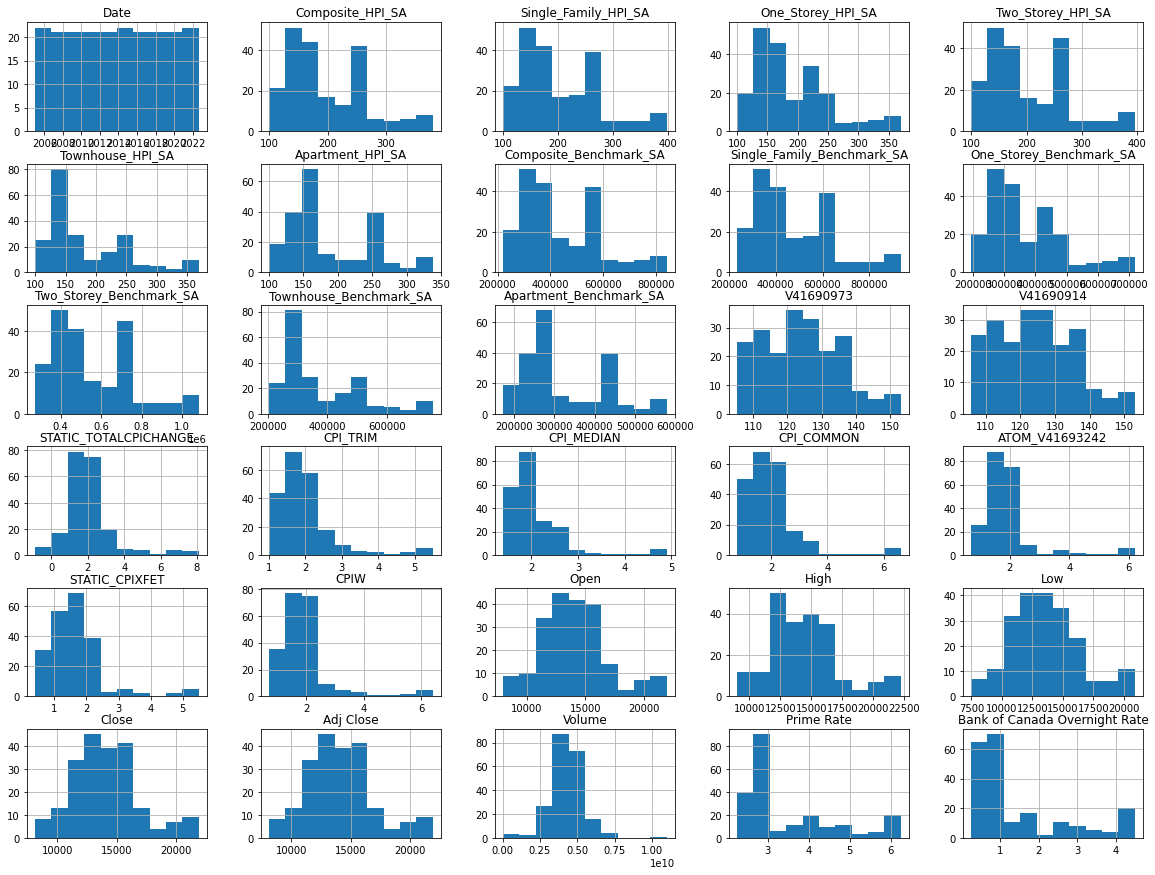

In [73]:
import matplotlib.pyplot as plt

df_housing.hist(figsize=(20, 15))
plt.show()

some of the data is skewed indicating presence of outliers

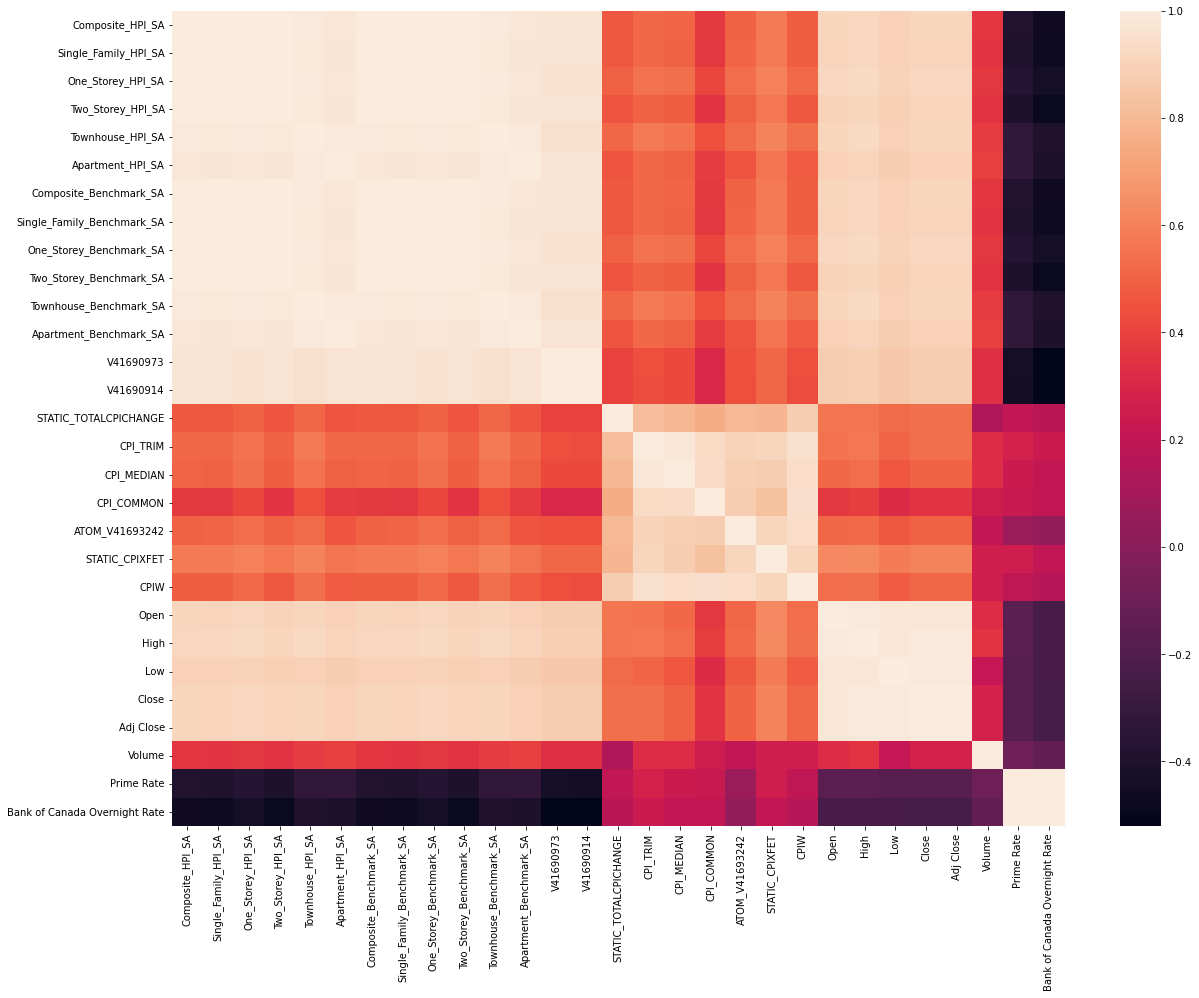

In [75]:
import seaborn as sns

corr = df_housing.corr()

# Create a figure with a larger size
plt.figure(figsize=(20, 15))

# Create a heatmap from the correlation matrix
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Show the plot
plt.show()

In [76]:
df_housing.corr()


,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,...,STATIC_CPIXFET,CPIW,Open,High,Low,Close,Adj Close,Volume,Prime Rate,Bank of Canada Overnight Rate
Composite_HPI_SA,1.000000,0.999388,0.997675,0.998622,0.990449,0.981915,1.000000,0.999388,0.997675,0.998624,...,0.576825,0.488650,0.910975,0.920235,0.896779,0.911151,0.911151,0.361173,-0.385606,-0.460765
Single_Family_HPI_SA,0.999388,1.000000,0.997118,0.999532,0.986014,0.974766,0.999388,1.000000,0.997119,0.999532,...,0.576184,0.485725,0.908979,0.917557,0.895545,0.909369,0.909369,0.353873,-0.397228,-0.471251
One_Storey_HPI_SA,0.997675,0.997118,1.000000,0.994453,0.992540,0.978380,0.997674,0.997116,1.000000,0.994455,...,0.597842,0.523586,0.917647,0.928200,0.901691,0.917832,0.917832,0.365668,-0.370300,-0.442829
Two_Storey_HPI_SA,0.998622,0.999532,0.994453,1.000000,0.982793,0.972788,0.998623,0.999533,0.994454,1.000000,...,0.568556,0.471206,0.904641,0.912560,0.892406,0.905222,0.905222,0.348203,-0.402283,-0.477061
Townhouse_HPI_SA,0.990449,0.986014,0.992540,0.982793,1.000000,0.992171,0.990447,0.986013,0.992532,0.982800,...,0.605480,0.539911,0.911692,0.924687,0.894845,0.911912,0.911912,0.377171,-0.320004,-0.395369
Apartment_HPI_SA,0.981915,0.974766,0.978380,0.972788,0.992171,1.000000,0.981909,0.974770,0.978377,0.972798,...,0.557892,0.482568,0.898054,0.910270,0.880718,0.897142,0.897142,0.390295,-0.323947,-0.403827
Composite_Benchmark_SA,1.000000,0.999388,0.997674,0.998623,0.990447,0.981909,1.000000,0.999389,0.997675,0.998625,...,0.576819,0.488660,0.910963,0.920220,0.896769,0.911142,0.911142,0.361157,-0.385644,-0.460801
Single_Family_Benchmark_SA,0.999388,1.000000,0.997116,0.999533,0.986013,0.974770,0.999389,1.000000,0.997117,0.999534,...,0.576164,0.485712,0.908969,0.917550,0.895538,0.909365,0.909365,0.353885,-0.397224,-0.471251
One_Storey_Benchmark_SA,0.997675,0.997119,1.000000,0.994454,0.992532,0.978377,0.997675,0.997117,1.000000,0.994456,...,0.597819,0.523538,0.917652,0.928207,0.901695,0.917838,0.917838,0.365677,-0.370310,-0.442840
Two_Storey_Benchmark_SA,0.998624,0.999532,0.994455,1.000000,0.982800,0.972798,0.998625,0.999534,0.994456,1.000000,...,0.568574,0.471219,0.904624,0.912546,0.892386,0.905208,0.905208,0.348244,-0.402278,-0.477059


In [77]:
df_housing.columns 

Index(['Date', 'Composite_HPI_SA', 'Single_Family_HPI_SA', 'One_Storey_HPI_SA',
       'Two_Storey_HPI_SA', 'Townhouse_HPI_SA', 'Apartment_HPI_SA',
       'Composite_Benchmark_SA', 'Single_Family_Benchmark_SA',
       'One_Storey_Benchmark_SA', 'Two_Storey_Benchmark_SA',
       'Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA', 'V41690973',
       'V41690914', 'STATIC_TOTALCPICHANGE', 'CPI_TRIM', 'CPI_MEDIAN',
       'CPI_COMMON', 'ATOM_V41693242', 'STATIC_CPIXFET', 'CPIW', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Prime Rate',
       'Bank of Canada Overnight Rate'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

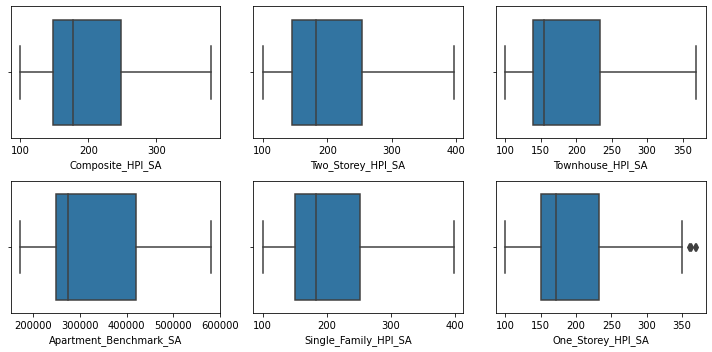

In [78]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df_housing['Composite_HPI_SA'], ax = axs[0,0])
plt2 = sns.boxplot(df_housing['Two_Storey_HPI_SA'], ax = axs[0,1])
plt3 = sns.boxplot(df_housing['Townhouse_HPI_SA'], ax = axs[0,2])
plt1 = sns.boxplot(df_housing['Apartment_Benchmark_SA'], ax = axs[1,0])
plt2 = sns.boxplot(df_housing['Single_Family_HPI_SA'], ax = axs[1,1])
plt3 = sns.boxplot(df_housing['One_Storey_HPI_SA'], ax = axs[1,2])

plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

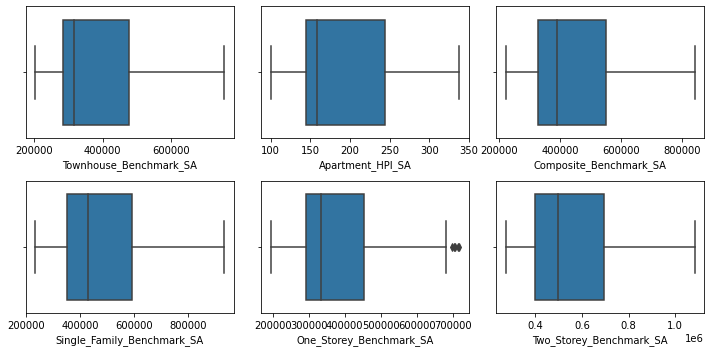

In [79]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df_housing['Townhouse_Benchmark_SA'], ax = axs[0,0])
plt2 = sns.boxplot(df_housing['Apartment_HPI_SA'], ax = axs[0,1])
plt3 = sns.boxplot(df_housing['Composite_Benchmark_SA'], ax = axs[0,2])
plt1 = sns.boxplot(df_housing['Single_Family_Benchmark_SA'], ax = axs[1,0])
plt2 = sns.boxplot(df_housing['One_Storey_Benchmark_SA'], ax = axs[1,1])
plt3 = sns.boxplot(df_housing['Two_Storey_Benchmark_SA'], ax = axs[1,2])

plt.tight_layout()       

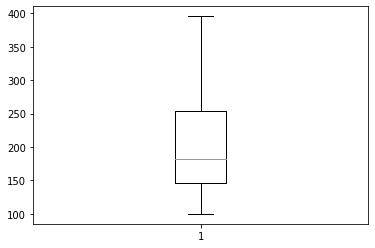

In [80]:
# outlier treatment for Two_Storey_HPI_SA
plt.boxplot(df_housing.Two_Storey_HPI_SA)
Q1 = df_housing.Two_Storey_HPI_SA.quantile(0.25)
Q3 = df_housing.Two_Storey_HPI_SA.quantile(0.75)
IQR = Q3 - Q1
df_housing = df_housing[(df_housing.Two_Storey_HPI_SA >= Q1 - 1.5*IQR) & (df_housing.Two_Storey_HPI_SA <= Q3 + 1.5*IQR)]

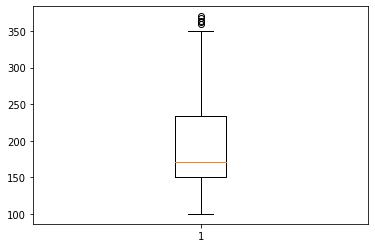

In [81]:
# outlier treatment for One_Storey_HPI_SA
plt.boxplot(df_housing.One_Storey_HPI_SA)
Q1 = df_housing.One_Storey_HPI_SA.quantile(0.25)
Q3 = df_housing.One_Storey_HPI_SA.quantile(0.75)
IQR = Q3 - Q1
df_housing = df_housing[(df_housing.One_Storey_HPI_SA >= Q1 - 1.5*IQR) & (df_housing.One_Storey_HPI_SA <= Q3 + 1.5*IQR)]

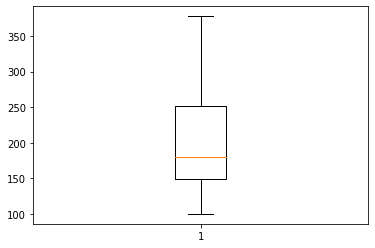

In [82]:
# outlier treatment for pcTownhouse_HPI_SA
plt.boxplot(df_housing.Single_Family_HPI_SA)
Q1 = df_housing.Single_Family_HPI_SA.quantile(0.25)
Q3 = df_housing.Single_Family_HPI_SA.quantile(0.75)
IQR = Q3 - Q1
df_housing = df_housing[(df_housing.Single_Family_HPI_SA >= Q1 - 1.5*IQR) & (df_housing.Single_Family_HPI_SA <= Q3 + 1.5*IQR)]

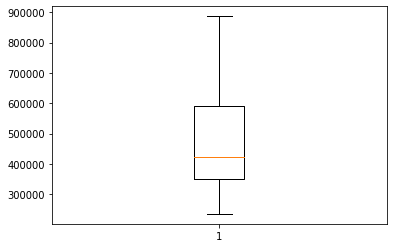

In [83]:
# outlier treatment for pcTownhouse_HPI_SA
plt.boxplot(df_housing.Single_Family_Benchmark_SA)
Q1 = df_housing.Single_Family_Benchmark_SA.quantile(0.25)
Q3 = df_housing.Single_Family_Benchmark_SA.quantile(0.75)
IQR = Q3 - Q1
df_housing = df_housing[(df_housing.Single_Family_Benchmark_SA >= Q1 - 1.5*IQR) & (df_housing.Single_Family_Benchmark_SA <= Q3 + 1.5*IQR)]

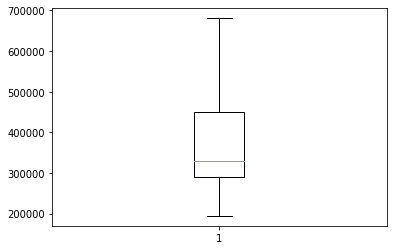

In [84]:
# outlier treatment for pcTownhouse_HPI_SA
plt.boxplot(df_housing.One_Storey_Benchmark_SA)
Q1 = df_housing.One_Storey_Benchmark_SA.quantile(0.25)
Q3 = df_housing.One_Storey_Benchmark_SA.quantile(0.75)
IQR = Q3 - Q1
df_housing = df_housing[(df_housing.One_Storey_Benchmark_SA >= Q1 - 1.5*IQR) & (df_housing.One_Storey_Benchmark_SA <= Q3 + 1.5*IQR)]

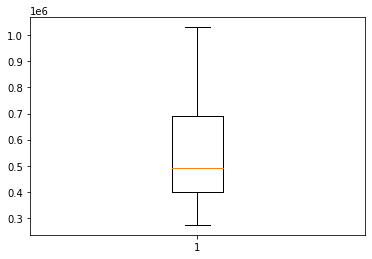

In [85]:
# outlier treatment for pcTownhouse_HPI_SA
plt.boxplot(df_housing.Two_Storey_Benchmark_SA)
Q1 = df_housing.Two_Storey_Benchmark_SA.quantile(0.25)
Q3 = df_housing.Two_Storey_Benchmark_SA.quantile(0.75)
IQR = Q3 - Q1
df_housing = df_housing[(df_housing.Two_Storey_Benchmark_SA >= Q1 - 1.5*IQR) & (df_housing.Two_Storey_Benchmark_SA <= Q3 + 1.5*IQR)]

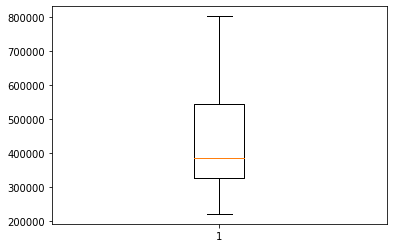

In [86]:
# outlier treatment for Composite_Benchmark_SA
plt.boxplot(df_housing.Composite_Benchmark_SA)
Q1 = df_housing.Composite_Benchmark_SA.quantile(0.25)
Q3 = df_housing.Composite_Benchmark_SA.quantile(0.75)
IQR = Q3 - Q1
df_housing = df_housing[(df_housing.Composite_Benchmark_SA >= Q1 - 1.5*IQR) & (df_housing.Composite_Benchmark_SA <= Q3 + 1.5*IQR)]

In [87]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Select the independent variables (columns to use as predictors)
X = df_housing[['Apartment_Benchmark_SA', 'Single_Family_HPI_SA', 'One_Storey_HPI_SA',
       'Two_Storey_HPI_SA', 'Townhouse_HPI_SA', 'Apartment_HPI_SA',
       'Composite_Benchmark_SA', 'Single_Family_Benchmark_SA',
       'One_Storey_Benchmark_SA', 'Two_Storey_Benchmark_SA',
       'Townhouse_Benchmark_SA']]

# Select the dependent variable (column to predict)
y = df_housing['Composite_HPI_SA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)


MSE: 0.0008
RMSE: 0.0285


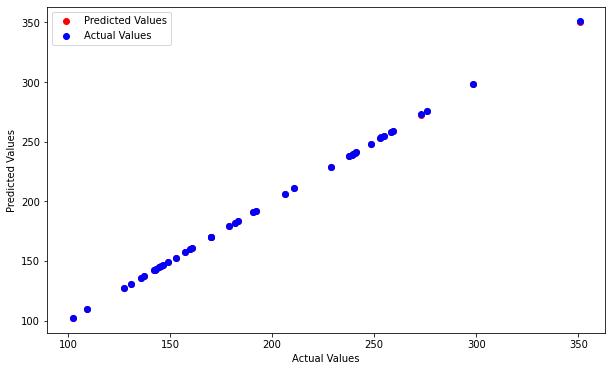

In [90]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

# Set the size of the display graph
plt.figure(figsize=(10,6))

# Plot the predicted values against the actual values and specify labels for the data sets
plt.scatter(y_test, predictions, color='red', label='Predicted Values')
plt.scatter(y_test, y_test, color='blue', label='Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add the legend to the graph and specify the location
plt.legend(loc='upper left')

plt.show()


As you can see the prediction is so good that the actual and predicted values overlap with each other. Also, the MSE and RMSE values are very low, which indicate that the model performed really well.

In [91]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, predictions)

print(f'MAE: {mae:.3f}')


MAE: 0.025


MAE value is very low, which indicates that the model performed really well.